# Pymaceuticals Inc.
---

### Analysis

1. There seems to be a correlation between weight and drug effectiveness. The larger the mouse, the less effective the drug regiment was. 

2. Although, I could not figure out how to code the remaining plots, the data seems to be very consistent visually, with very little outliers. 

3. Capomulin and Ramicane were the most effective.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
data_complete.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.

mice_number = len(data_complete["Mouse ID"].unique())
mice_number


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = data_complete[data_complete.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_mice, sep='\n')


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data = data_complete.loc[data_complete["Mouse ID"] == "g989"]
duplicate_mice_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


mice_data_clean = data_complete[data_complete['Mouse ID']!='g989']
mice_data_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.

mice_number_clean = len(mice_data_clean["Mouse ID"].unique())
mice_number_clean


248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df_avg = mice_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
df_median = mice_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
df_var = mice_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
df_std = mice_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
df_sem = mice_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats_df = pd.concat([df_avg, df_median, df_var, df_std, df_sem], axis=1)

stats_df
stats_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Std. Error']
stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stats_df_2 = mice_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
stats_df_2.columns = ['Mean Tumor Volume', 'Median Tumor Volume','Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Std. Error']
stats_df_2


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Count'>

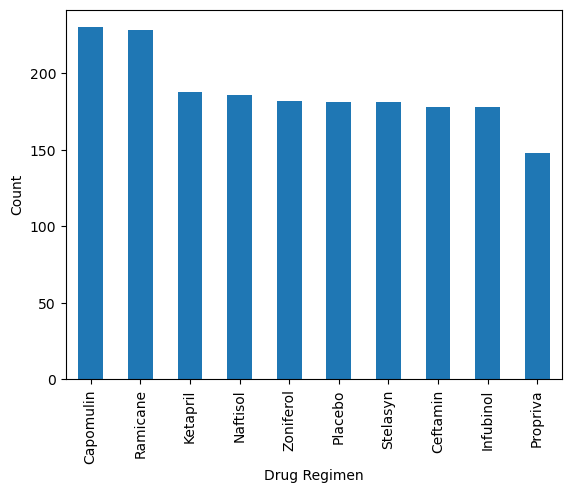

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_data_clean.groupby(['Drug Regimen'])["Mouse ID"].count().sort_values(ascending=False).plot.bar(ylabel='Count')


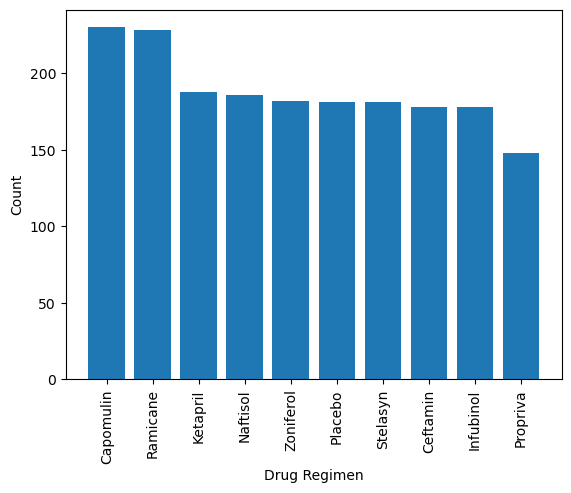

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

barplot = mice_data_clean.groupby(['Drug Regimen'])["Mouse ID"].count().sort_values(ascending=False)
x = barplot.index
y = barplot.values

plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Count');


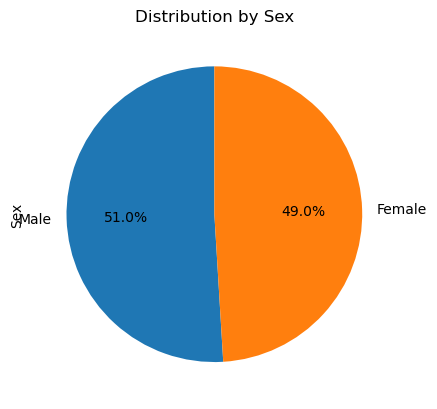

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data = mice_data_clean['Sex'].value_counts()
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')







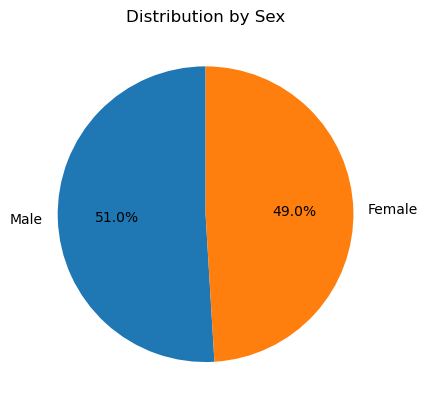

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = mice_data_clean['Sex'].value_counts()
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()




## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tp_df = mice_data_clean.groupby(['Mouse ID'])['Timepoint'].max()
greatest_tp_df = greatest_tp_df.reset_index()
greatest_tp_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

clean_merged_df = pd.merge(mice_data_clean, greatest_tp_df, on=['Mouse ID','Timepoint'], how='right')
clean_merged_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [43]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
treatment_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = clean_merged_df.loc[clean_merged_df['Drug Regimen'] == name, 'Tumor Volume (mm3)']
    
    # add subset 
    treatment_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds

    quartiles = tumor_vol.quantile([.25, .5, .75])
    upperq = quartiles[.75]
    lowerq = quartiles[.25]
    IQR = upperq - lowerq
    upperbound = upperq + (1.5*IQR)
    lowerbound = lowerq - (1.5*IQR)


    outliers = tumor_vol.loc[(tumor_vol > upperbound) | (tumor_vol < lowerbound)]
                                                        
print(f"{name}'s outliers: {outliers}")

Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Tumor Volume by Treatment')

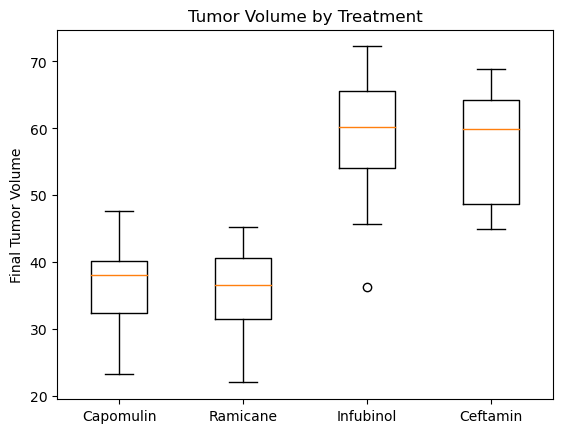

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(treatment_data)
plt.xticks([1,2,3,4], treatment)

plt.ylabel("Final Tumor Volume")
plt.title('Tumor Volume by Treatment')


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs Time Point')

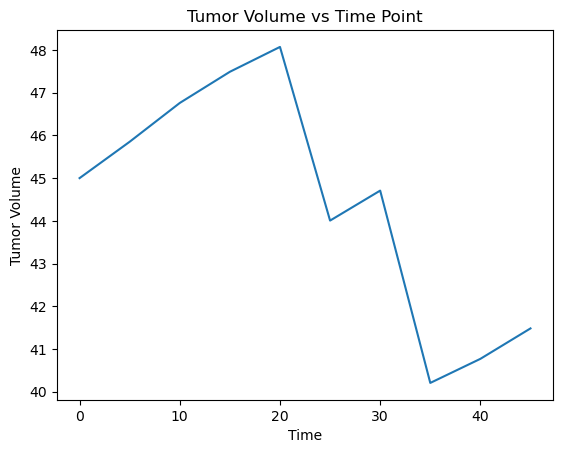

In [58]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

x = mice_data_clean.set_index("Mouse ID")
capomulin_mouse = x.loc["l509",["Timepoint", "Tumor Volume (mm3)"]]
x_axis = capomulin_mouse["Timepoint"]
plt.plot(x_axis, capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume vs Time Point")




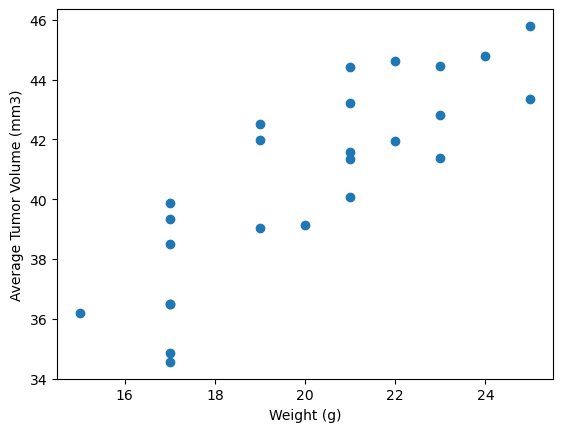

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen






## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


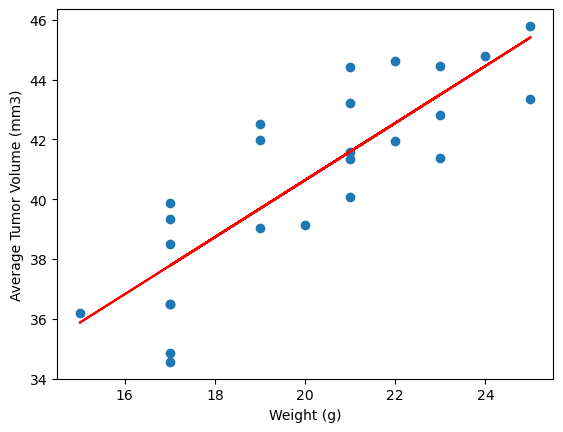

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
